# **Capstone Project: E-commerce Sales Analysis**: 🎓📊

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Team Information 👥

</h1>

---


**Team 8** - Sprints Bootcamp

**Team Members:**
  ```
Remas
Menna Magdy Mohamed
Ibrahim Abdel Basir Gomaa
Fady Raouf
Mohamed Alaa Farrag
```




# **Setting Up the Environment** 🛠️

---



In [1]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


##Import libraries

In [60]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt# For handling time series data
import seaborn as sns  # For statistical data visualization
import plotly.graph_objects as go
import time 




##Load the DataSet

In [4]:
data_sales = pd.read_csv('data.csv', encoding='unicode_escape')

##Set Plot Style (Optional)



In [176]:
display(data_sales)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,WHITE,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,WHITE,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,CREAM,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,KNITTED,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,RED,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,PACK,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,CHILDREN'S,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,CHILDRENS,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,CHILDRENS,Friday


## Basic Data Overview

In [177]:
print(data_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
 9   Category     530104 non-null  object        
 10  DayOfWeek    530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 48.5+ MB
None


# 🎯 **Task 1 : Data Cleaning** 🧹
**Description**: Clean and preprocess the dataset by handling missing values, formatting data types, and removing incorrect records.

**Requirments**:
- Handle missing values in CustomerID
- Convert InvoiceDate to DateTime type
- Remove rows with negative Quantity or UnitPrice
- Create a TotalPrice column




In [208]:
#detect missing data
missing_sales=data_sales.isnull().sum()
print(missing_sales)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Category       0
DayOfWeek      0
dtype: int64


In [179]:
# Fill missing CustomerID by propagating from InvoiceNo group
# data_sales['CustomerID'] = data_sales.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.ffill().bfill())
# Handle missing values in CustomerID (e.g., fill with a placeholder or drop rows)
data_sales['CustomerID'].fillna('Unknown', inplace=True)



C:\Users\fady\AppData\Local\Temp\ipykernel_10812\2050722795.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [237]:

# Convert InvoiceDate to DateTime type
data_sales['InvoiceDate'] = pd.to_datetime(data_sales['InvoiceDate'])

display(data_sales['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 530104, dtype: datetime64[ns]

In [238]:
# Remove rows with negative Quantity or UnitPrice
data_sales = data_sales[(data_sales['Quantity'] > 0) & (data_sales['UnitPrice'] > 0)]


In [239]:
# Create a TotalPrice column (Quantity * UnitPrice)
data_sales['TotalPrice'] = data_sales['Quantity'] * data_sales['UnitPrice']

print(data_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
 9   Category     530104 non-null  object        
 10  DayOfWeek    530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 48.5+ MB
None


In [240]:
#detect missing data after cleaning
missing_sales=data_sales.isnull().sum()
print(missing_sales)
print(data_sales.info())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Category       0
DayOfWeek      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
 9   Category     530104 non-null  object        
 10  DayOfWeek    530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64

# 🎯 **Task 2 : Exploratory Data Analysis (EDA)** 🔍
**Description**: Perform basic descriptive statistics and identify insights from the dataset. Analyze top-selling products and calculate total revenue and transactions.values. You will also check the data types of each column to understand how the data is structured.

**Requirments**:
-  Use .describe() for statistical summary.
- Identify top 10 selling products by Quantity.
- Calculate total revenue and number of transactions.



In [289]:
# Statistical summary
display(data_sales.describe())

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,530104.000000,530104,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.600000
std,155.524124,NaN,35.915681,270.356743


In [290]:
# Top 10 selling products by Quantity
top_products = data_sales.groupby('Description')['Quantity'].sum().nlargest(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


In [291]:
# Total revenue and number of transactions
total_revenue = data_sales['TotalPrice'].sum()
total_transactions = data_sales['InvoiceNo'].nunique()
print(f"Total Revenue: {total_revenue}")
print(f"Total Transactions: {total_transactions}")

Total Revenue: 10666684.544
Total Transactions: 19960


In [292]:
# Check data types of each column
print("\nData Types:")
print(data_sales.dtypes)


Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
Category               object
DayOfWeek              object
dtype: object


# 🎯 **Task 3 : Time Series Analysis** 📅📈
**Description**: Analyze sales trends over time and visualize monthly sales. Identify months with highest and lowest sales.

**Requirments**:
-  Resample the data to obtain monthly sales
-  Plot monthly sales trends using a line plot.
-  Identify the month with the highest and lowest sales.


In [293]:
# Resample data to obtain monthly sales
monthly_sales = data_sales.resample('ME', on='InvoiceDate')['TotalPrice'].sum()

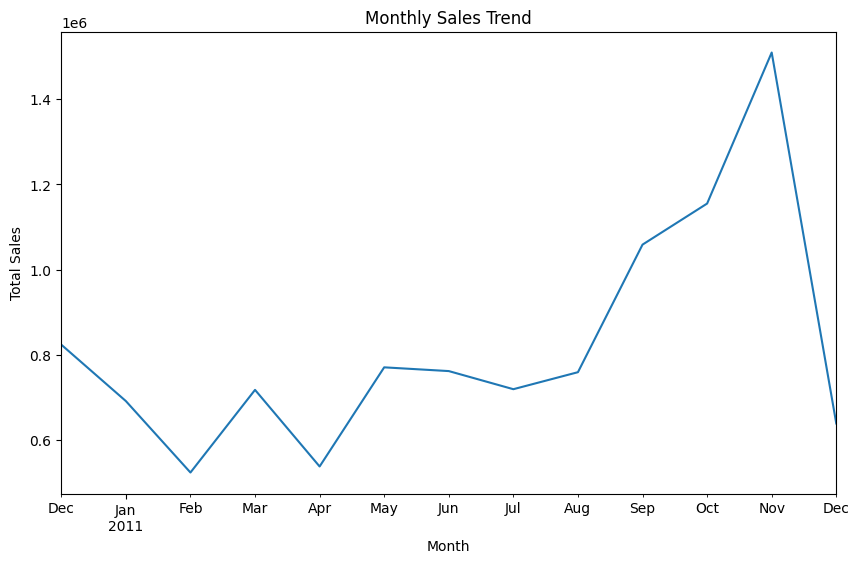

In [294]:
# Plot monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [295]:
 #Identify the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")

Highest Sales Month: 2011-11-30 00:00:00
Lowest Sales Month: 2011-02-28 00:00:00


# 🎯 **Task 4 : RFM Analysis (Customer Segmentation)** 🧩
**Description**: Segment customers based on recency, frequency, and monetary value. Visualize customer distribution in segments.

**Requirments**:
-  Calculate recency (days since last purchase).
-  Calculate frequency (number of purchases).
-  Calculate monetary value (total spend).
-  Segment customers into High, Medium, Low-value groups.



In [296]:
# Calculate Recency, Frequency, and Monetary value
snapshot_date = data_sales['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = data_sales.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [297]:
# Segment customers
rfm['Segment'] = pd.qcut(rfm['Monetary'], 3, labels=['Low', 'Medium', 'High'])
print(rfm.head())

            Recency  Frequency  Monetary Segment
CustomerID                                      
12346.0         326          1  77183.60    High
12347.0           2          7   4310.00    High
12348.0          75          4   1797.24    High
12349.0          19          1   1757.55    High
12350.0         310          1    334.40     Low


# 🎯 **Task 5 : Product Category Analysis** 📦💰
**Description**: Analyze sales and revenue by product category and visualize the top categories by revenue.

**Requirments**:
-  Extract product category from Description.
-  Calculate sales and revenue by category.
-  Create a bar plot of the top 5 categories by revenue.



In [298]:
# Extract product category from Description
data_sales['Category'] = data_sales['Description'].apply(lambda x: x.split()[0])

In [299]:
# Calculate sales and revenue by category
category_revenue = data_sales.groupby('Category')['TotalPrice'].sum().nlargest(5)

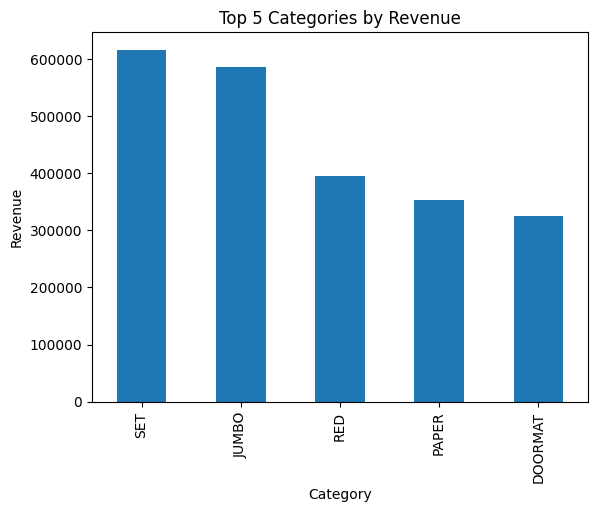

In [300]:
# Create a bar plot of the top 5 categories by revenue
category_revenue.plot(kind='bar', title='Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

# 🎯 **Task 6 : Geographical Analysis** 🌍📊
**Description**: Analyze sales distribution by country and identify top revenue-generating countries.

**Requirments**:
-  Calculate total revenue by country.
-  Create a bar plot of the top 10 countries by revenue.
-  Calculate the percentage of sales from the top 3 countries.



In [301]:
# Calculate total revenue by country
country_revenue = data_sales.groupby('Country')['TotalPrice'].sum()

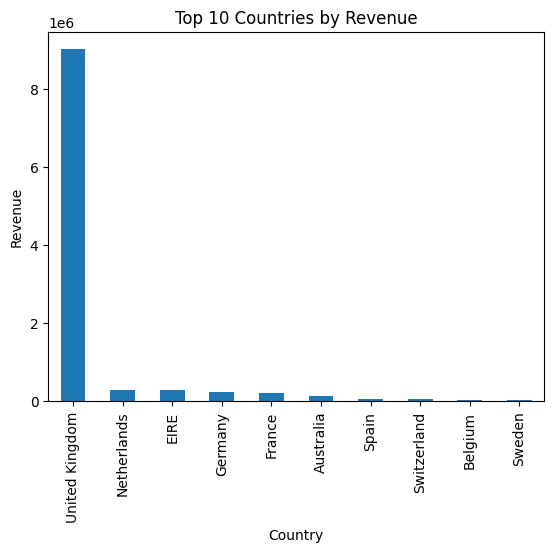

In [302]:
# Create a bar plot of the top 10 countries by revenue
country_revenue.nlargest(10).plot(kind='bar', title='Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

In [303]:
# Calculate the percentage of sales from the top 3 countries
top_3_countries = country_revenue.nlargest(3).sum() / country_revenue.sum() * 100
print(f"Percentage of Sales from Top 3 Countries: {top_3_countries:.2f}%")

Percentage of Sales from Top 3 Countries: 89.94%


# 🎯 **Task 7 : Customer Behavior Analysis** 👤🛒
**Description**: Analyze customer behavior based on order quantity, sales, and purchasing patterns.

**Requirments**:
-  Plot the distribution of order quantities.
-  Create a scatter plot of Quantity vs. TotalPrice.
-  Calculate and plot average daily sales throughout the week.



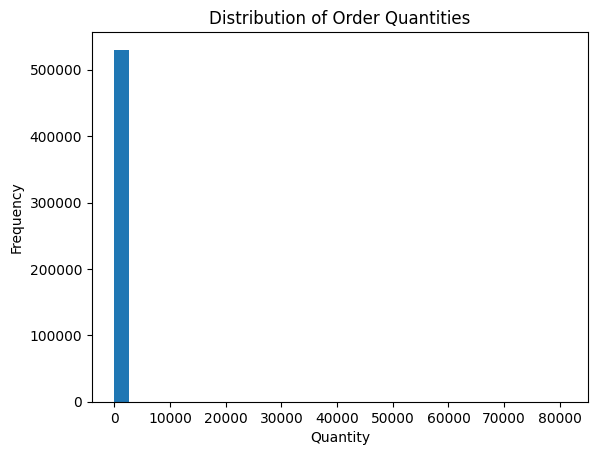

In [304]:
# Plot the distribution of order quantities
data_sales['Quantity'].plot(kind='hist', bins=30, title='Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.show()


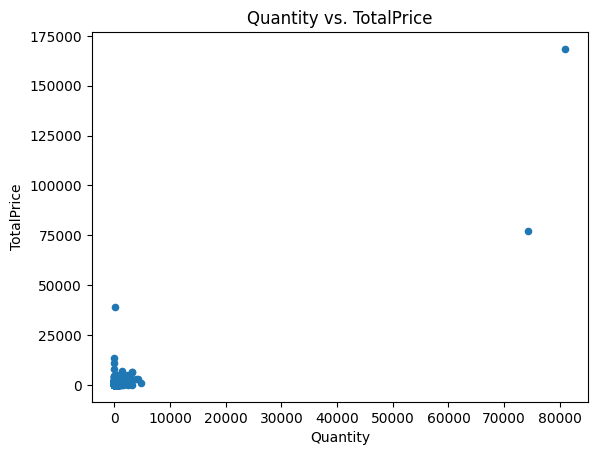

In [305]:
# Create a scatter plot of Quantity vs. TotalPrice
data_sales.plot.scatter(x='Quantity', y='TotalPrice', title='Quantity vs. TotalPrice')
plt.show()

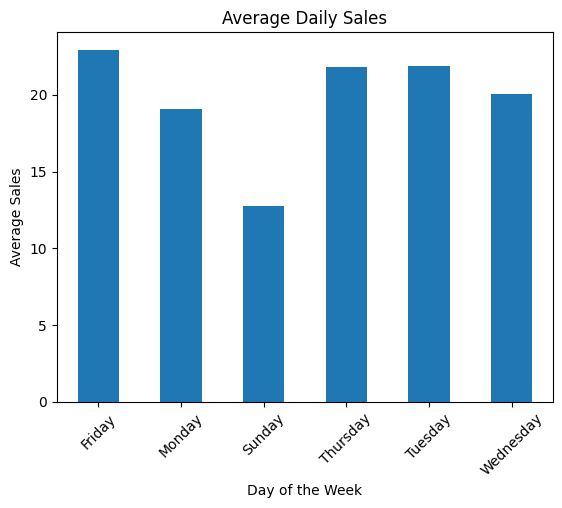

In [306]:
# Calculate and plot average daily sales throughout the week
data_sales['DayOfWeek'] = data_sales['InvoiceDate'].dt.day_name()
average_daily_sales = data_sales.groupby('DayOfWeek')['TotalPrice'].mean()
average_daily_sales.plot(kind='bar', title='Average Daily Sales')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.show()

# 🎯 **Task 8 : Moving Average Forecast** 📉🔮
**Description**: Implement a basic moving average forecast for sales based on past data.

**Requirments**:
-  Prepare daily sales data.
-  Calculate a 7-day moving average of sales.
-  Plot actual sales vs. moving average for the last 3 months.


In [307]:
# Prepare daily sales data
daily_sales = data_sales.resample('D', on='InvoiceDate')['TotalPrice'].sum()

In [308]:
# Calculate a 7-day moving average of sales
moving_average = daily_sales.rolling(window=7).mean()


In [309]:
# Create an interactive plot with Plotly
fig = go.Figure()

# Add actual sales trace
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales, mode='lines', name='Actual Sales'))

# Add moving average trace
fig.add_trace(go.Scatter(x=moving_average.index, y=moving_average, mode='lines', name='7-Day Moving Average'))
# Update layout
fig.update_layout(
    title='Actual Sales vs. 7-Day Moving Average',
    xaxis_title='Date',
    yaxis_title='Sales',
    legend_title='Legend',
    hovermode='x unified'
)

# Show the plot
fig.show()

# 🎯 **Task 9 : Summary Dashboard Creation** 📊📺
**Description**: Create a dashboard that summarizes key insights through visualizations.

**Requirments**:

Create a 2x2 subplot with:
  1.   Monthly sales trend
  2.   Top 5 products by revenue
  3.   Customer segment distribution
  4.   Top 5 countries by revenue.




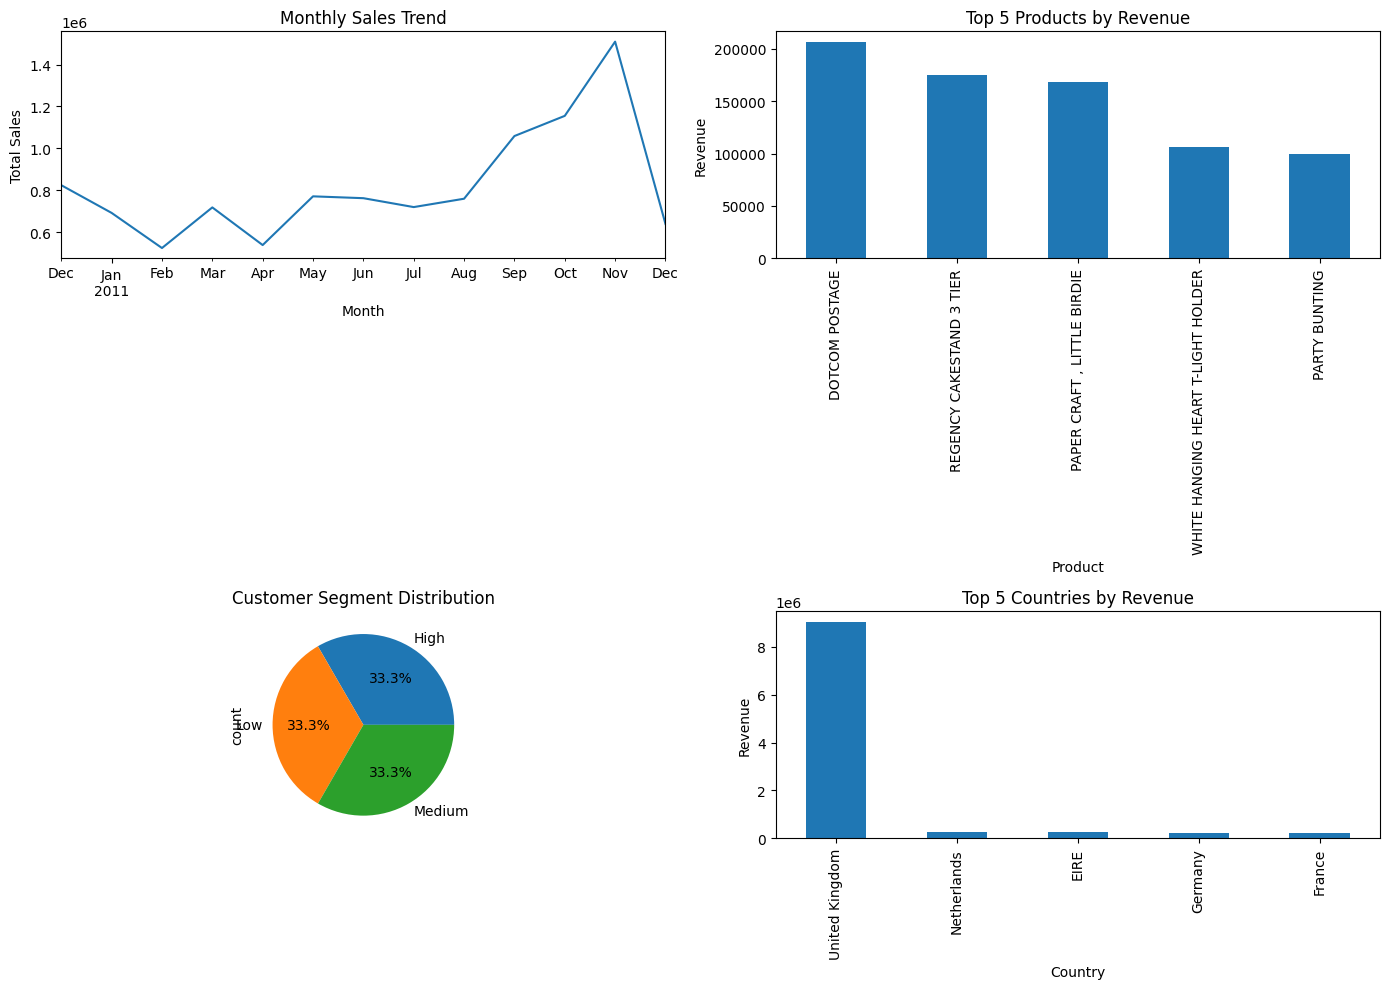

In [310]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly sales trend
monthly_sales.plot(ax=axes[0, 0], title='Monthly Sales Trend')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales')

# Top 5 products by revenue
top_products_revenue = data_sales.groupby('Description')['TotalPrice'].sum().nlargest(5)
top_products_revenue.plot(kind='bar', ax=axes[0, 1], title='Top 5 Products by Revenue')
axes[0, 1].set_xlabel('Product')
axes[0, 1].set_ylabel('Revenue')

# Customer segment distribution
rfm['Segment'].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', title='Customer Segment Distribution')

# Top 5 countries by revenue
country_revenue.nlargest(5).plot(kind='bar', ax=axes[1, 1], title='Top 5 Countries by Revenue')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


# 🎯 **Task 10 : Optimize Data Processing** ⚡💻
**Description**: Optimize a computationally intensive task using vectorized operations.

**Requirments**:
-  Implement a task using loops.
-  Implement the same task using vectorized operations.
-  Compare and report performance differences.




In [311]:
# Task using loops
start_time = time.time()
total_price_loop = []
for index, row in data_sales.iterrows():
    total_price_loop.append(row['Quantity'] * row['UnitPrice'])
print("Loop Time:", time.time() - start_time)

# Task using vectorized operations
start_time = time.time()
total_price_vectorized = data_sales['Quantity'] * data_sales['UnitPrice']
print("Vectorized Time:", time.time() - start_time)

# Compare results
print("Results are the same:", np.allclose(total_price_loop, total_price_vectorized))

Loop Time: 19.529361486434937
Vectorized Time: 0.002972841262817383
Results are the same: True


# 🎯 **Task 11 : Report Generation** 📜📋
**Description**: Generate a summary report with key insights and recommendations.

**Requirments**:
-  Summarize overall revenue, top-selling products, best customer segments, and countries.
-  Provide insights from time series analysis and recommendations.




In [312]:
# Summary report
print("Summary Report")
print("--------------")
print(f"Total Revenue: {total_revenue}")
print(f"Total Transactions: {total_transactions}")
print("Top-Selling Products:")
print(top_products)
print("Best Customer Segments:")
print(rfm['Segment'].value_counts())
print("Top Revenue-Generating Countries:")
print(country_revenue.nlargest(5))
print("Insights from Time Series Analysis:")
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")
print("Recommendations:")
print("- Focus on high-value customer segments for targeted marketing.")
print("- Explore opportunities in top revenue-generating countries.")
print("- Monitor sales trends to optimize inventory and promotions.")

Summary Report
--------------
Total Revenue: 10666684.544
Total Transactions: 19960
Top-Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64
Best Customer Segments:
Segment
High      1447
Low       1446
Medium    1446
Name: count, dtype: int64
Top Revenue-Generating Countries:
Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalPrice, dtype: float64
Insights from Time Series Analysis:
Highest Sales Month: 2011-11-30 00:00:00
Lowest S